# Demo of visualizations in `Context`s and the context browser

Note the viasualizations also work while nested deeper in JSON-like objects. (See the image example.)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from interlab.context import FileStorage, Context
from interlab.utils.html import Html
from interlab.ext.pyplot import capture_figure
from interlab.llm.format_str import FormatStr

In [2]:
storage = FileStorage("logs")
storage.start_server()

[2023-07-25 15:38:01,828] INFO(interlab): Started context UI server: <ServerHandle http://localhost:37685>


<ServerHandle http://localhost:37685>

^^^^^^^^^^^^^^ Open context browser at this URL

## Changing context colors

In [3]:
with Context("vis-colors", storage=storage):
    with Context("first", meta={"color": "green"}):
        pass
    with Context("second", meta={"color_bg": "lightblue"}):
        pass            
    with Context("third", meta={"color_bg": "#994404", "color_text": "white"}) as c:
        c.set_result("text")

## Recursively colored formatted strings

In [5]:
with Context("fmtstring", storage=storage) as c:
    # One bit of memory
    one_mem = FormatStr("* Memory at time {time}:\n  text={text!r}")
    print(one_mem)

    # Can be used with explicit format
    memory_data = [(42, "the answer"), (-1, "Don't remember"), (3.1415926, "Pie time!")]
    all_mems = FormatStr("\n\n").join(one_mem.format(time=a, text=b) for a, b in memory_data)
    y = FormatStr("# Memory\n\n{mem}\n\n## End of memory\n\nLong block of text, but having name={name!r} and also an {unused_field}, then going on like ex purus, interdum imperdiet libero vel, volutpat vulputate lacus. In sit amet varius mi, at sollicitudin purus. Nunc elit nunc, molestie non quam ac, placerat mattis ante. Praesent non feugiat est. Donec ullamcorper non quam a tempor. {insert} Suspendisse blandit est quis diam efficitur, eu blandit odio viverra, et cetera and so on until {what}.")
    y = y.format(mem=all_mems)

    # You can also do this to simulate a f-string using local variables:
    name = "Alice"
    what = "THE END"    
    insert = "Nam ut egestas ipsum, in mattis mi."
    y = y.format(**locals())

    # Attach to context
    c.add_input("memory_data", memory_data)
    c.set_result({'full_text': y, "all_mems": all_mems, "one_mem": one_mem})

* Memory at time {time}:
  text={text!r}


## Visualizing images, HTML and SVG

<Figure size 200x150 with 0 Axes>

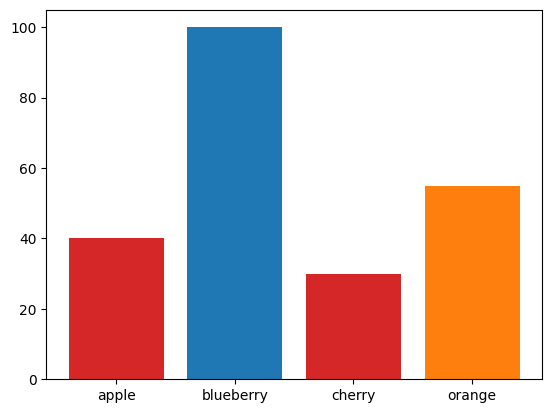

In [4]:
# Image demo

with Context("vis-image", storage=storage) as root:

    plt.figure(figsize=(2,1.5))
    fig, ax = plt.subplots()
    
    fruits = ['apple', 'blueberry', 'cherry', 'orange']
    counts = [40, 100, 30, 55]
    bar_labels = ['red', 'blue', '_red', 'orange']
    bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
    
    ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

    complex_data_structure = {
        "foo": ["Bar", "Baz"],
        "my_chart": { "label": "Nice chart", "image": capture_figure() },
        "more_data": "Lorem ipsum dolor sit amet, consectetur adipiscing elit.\nDonec sagittis nunc ut felis eleifend, non lobortis neque commodo.\n" * 10
    }
    
    with Context("image demo", inputs={"first_param": complex_data_structure, "other_param": 42}) as root2:
        pass

In [5]:
# HTML snippets: simple table (unstyled)

with Context("vis-html", storage=storage) as root:
    root.set_result(Html("""       
       <table style='border: 1px solid black'>
          <tr><td>Player 1</td><td>7</td</tr>
          <tr><td>Player 2</td><td>12</td></tr>
       </table>""".replace("<td", "<td style='border: 1px solid black'")))

In [6]:
# SVG via HTML: tic-tac-toe

with Context("vis-svg", storage=storage) as root:
    root.set_result(Html("""       
       <svg style="width: 100px; height: 100px" viewBox="0 0 100 100" xmlns="http://www.w3.org/2000/svg">
       <line x1="0" y1="33" x2="100" y2="33" stroke="black" />
       <line x1="0" y1="66" x2="100" y2="66" stroke="black" />       
       <line x1="33" y1="0" x2="33" y2="100" stroke="black" />       
       <line x1="66" y1="0" x2="66" y2="100" stroke="black" />

       <line x1="5" y1="5" x2="27" y2="27" stroke="blue" stroke-width="3"/>
       <line x1="27" y1="5" x2="5" y2="27" stroke="blue" stroke-width="3"/>

       <circle cx="49" cy="49" r="10" stroke="red" stroke-width="3" fill="none"/>
</svg>"""))